# EDA : Neighborhood Insight, Qurtubah



<img src="qmap.png" style="height:400px; padding:20px;">


This project will examine Qurtubah, a neihborhood in Riyadh city according to the following measures: destinations, diversity, density, family friendliness.


### Target Audience

if done on a bigger-scale to include all neiborhoods in the city, such project will benifit : 
- Someone who's moving to Riyadh and looking for a perfect neighborhood for their needs.
- Someone who's looking for a place to buy or rent.
- Business owners looking to expand their business to a new location.

### PROJECT QUESTIONS

- How diverse are the destinations in Qurtubah?
- What are the best destinations?
- How is the neighborhood family friendly?
- How is rent affected in comparsion to other neighborhoods?

## 1) Loading and checking the dataset

In [184]:
import pandas as pd 

In [472]:
places= pd.read_csv('/Users/workplace/Documents/GitHub/Neighborhood-Insight-Qurtubah/data/places.csv')


In [190]:
places.shape


(2145, 8)

In [191]:
places.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2145 non-null   object 
 1   category      2113 non-null   object 
 2   dist          1871 non-null   object 
 3   lat           2086 non-null   float64
 4   lng           2086 non-null   float64
 5   rating        1929 non-null   float64
 6   reviewsCount  2085 non-null   float64
 7   price         288 non-null    object 
dtypes: float64(4), object(4)
memory usage: 134.2+ KB


In [192]:
places.head()


,title,category,dist,lat,lng,rating,reviewsCount,price
0,أسواق ثمرات الجنتين,Supermarket,"RQ85+RX Al Munsiyah, Riyadh Saudi Arabia",24.817080,46.759923,3.6,197.0,NaN
1,Meed Store,Convenience store,NaN,24.788248,46.738404,3.9,81.0,NaN
2,Alsultan mart,Supermarket,"RQ85+J7 Al Munsiyah, Riyadh Saudi Arabia",24.816546,46.758185,4.0,253.0,NaN
3,Nespresso,Coffee vending machine,NaN,24.757320,46.630134,4.2,351.0,NaN
4,Wadi square,Shopping mall,"QPQ2+RG Al Wadi, Riyadh Saudi Arabia",24.789562,46.701330,4.5,4.0,NaN


## 2) Data Cleaning 

check for duplicates 

In [473]:
places.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2140     True
2141     True
2142     True
2143     True
2144     True
Length: 2145, dtype: bool

In [474]:
places.drop_duplicates(inplace=True)


In [475]:
places.shape


(2137, 8)

Check for nulls 

In [476]:
places.isna().sum()

title              0
category          32
dist             274
lat               59
lng               59
rating           208
reviewsCount      52
price           1849
dtype: int64

- for rating and reviewscount I'll leave nulls, becuase these places hasn't been reviewd yet.
- for long and lat I'll leave them, becuase I need to count the number of destinations.
- for the nulls in dist I'll calculate the distance in kms using lat and lng.  
- I'll leave the nulls in price column as they are.


In [477]:
neighborhood_latitude=24.8166
neighborhood_longitude=46.7320


In [478]:
#method to calculate distance.
# 
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d


In [479]:
places['distance'] = places.apply(lambda row: distance((float(neighborhood_latitude),float(neighborhood_longitude)),(row['lat'],row['lng'])), axis=1)

In [480]:
places.head()


,title,category,dist,lat,lng,rating,reviewsCount,price,distance
0,أسواق ثمرات الجنتين,Supermarket,"RQ85+RX Al Munsiyah, Riyadh Saudi Arabia",24.817080,46.759923,3.6,197.0,NaN,2.818646
1,Meed Store,Convenience store,NaN,24.788248,46.738404,3.9,81.0,NaN,3.218145
2,Alsultan mart,Supermarket,"RQ85+J7 Al Munsiyah, Riyadh Saudi Arabia",24.816546,46.758185,4.0,253.0,NaN,2.642804
3,Nespresso,Coffee vending machine,NaN,24.757320,46.630134,4.2,351.0,NaN,12.214699
4,Wadi square,Shopping mall,"QPQ2+RG Al Wadi, Riyadh Saudi Arabia",24.789562,46.701330,4.5,4.0,NaN,4.315402


In [481]:
temp=places[(places['dist'].isna()) & (places['distance']<=2.2)]


In [482]:
temp.dist='Qurtubah'


In [483]:
temp


,title,category,dist,lat,lng,rating,reviewsCount,price,distance
8,Abdullah Alothaim Markets,Supermarket,Qurtubah,24.821437,46.742188,3.8,215.0,NaN,1.160378
15,مانويل ماركت,Supermarket,Qurtubah,24.829196,46.726967,5.0,2.0,NaN,1.489884
26,Panda Super market Qurtubah,Supermarket,Qurtubah,24.813905,46.724659,1.0,1.0,NaN,0.799264
39,BAJA,Supermarket,Qurtubah,24.811075,46.734269,4.7,7.0,NaN,0.655678
77,looz & Jooz,Nut store,Qurtubah,24.814830,46.726020,4.1,42.0,NaN,0.634871
...,...,...,...,...,...,...,...,...,...
1853,Mini Mart,Grocery store,Qurtubah,24.808720,46.732702,NaN,0.0,NaN,0.879101
1854,طاحون حسين,Grocery store,Qurtubah,24.818429,46.752263,3.9,10.0,NaN,2.055147
1857,comilla super market,Grocery store,Qurtubah,24.806166,46.720211,5.0,1.0,NaN,1.661825
1859,Thimar Alqassim Super Market,Grocery store,Qurtubah,24.814820,46.753083,3.7,21.0,NaN,2.137049


In [484]:
places.shape


(2137, 9)

In [485]:
places=places.append(temp)


In [486]:
places.reset_index(drop=True, inplace=True)


In [487]:
places = places.dropna(subset=['dist'], how='any')


In [488]:
places.isna().sum()


title              0
category          32
dist               0
lat               56
lng               56
rating           182
reviewsCount      50
price           1650
distance          56
dtype: int64

In [489]:
places


,title,category,dist,lat,lng,rating,reviewsCount,price,distance
0,أسواق ثمرات الجنتين,Supermarket,"RQ85+RX Al Munsiyah, Riyadh Saudi Arabia",24.817080,46.759923,3.6,197.0,NaN,2.818646
2,Alsultan mart,Supermarket,"RQ85+J7 Al Munsiyah, Riyadh Saudi Arabia",24.816546,46.758185,4.0,253.0,NaN,2.642804
4,Wadi square,Shopping mall,"QPQ2+RG Al Wadi, Riyadh Saudi Arabia",24.789562,46.701330,4.5,4.0,NaN,4.315402
5,مستشفى الرياض,Hospital,"RQ92+4X Qurtubah, Riyadh Saudi Arabia",24.817779,46.752472,2.4,16.0,NaN,2.070278
6,Rocca supermarket روكا سوبرماركت,Supermarket,"RPGX+4R Al Munsiyah, Riyadh Saudi Arabia",24.825270,46.749617,3.9,75.0,NaN,2.022466
...,...,...,...,...,...,...,...,...,...
2199,Mini Mart,Grocery store,Qurtubah,24.808720,46.732702,NaN,0.0,NaN,0.879101
2200,طاحون حسين,Grocery store,Qurtubah,24.818429,46.752263,3.9,10.0,NaN,2.055147
2201,comilla super market,Grocery store,Qurtubah,24.806166,46.720211,5.0,1.0,NaN,1.661825
2202,Thimar Alqassim Super Market,Grocery store,Qurtubah,24.814820,46.753083,3.7,21.0,NaN,2.137049


In [490]:
places[(places['distance']<=2.2)]


,title,category,dist,lat,lng,rating,reviewsCount,price,distance
5,مستشفى الرياض,Hospital,"RQ92+4X Qurtubah, Riyadh Saudi Arabia",24.817779,46.752472,2.4,16.0,NaN,2.070278
6,Rocca supermarket روكا سوبرماركت,Supermarket,"RPGX+4R Al Munsiyah, Riyadh Saudi Arabia",24.825270,46.749617,3.9,75.0,NaN,2.022466
9,SASCO Palm,Convenience store,"RPMP+V5 King Khalid International Airport, Riy...",24.834651,46.735476,4.0,335.0,NaN,2.037614
10,أسواق ومخابز الغدق للمواد الغذائية,Supermarket,"RP9J+Q3 Qurtubah, Riyadh Saudi Arabia",24.819418,46.730171,4.0,153.0,NaN,0.363613
13,سلة البساتين للتموين الغذائي,Supermarket,"RQ92+6V Qurtubah, Riyadh Saudi Arabia",24.818088,46.752208,3.7,228.0,NaN,2.046173
...,...,...,...,...,...,...,...,...,...
2199,Mini Mart,Grocery store,Qurtubah,24.808720,46.732702,NaN,0.0,NaN,0.879101
2200,طاحون حسين,Grocery store,Qurtubah,24.818429,46.752263,3.9,10.0,NaN,2.055147
2201,comilla super market,Grocery store,Qurtubah,24.806166,46.720211,5.0,1.0,NaN,1.661825
2202,Thimar Alqassim Super Market,Grocery store,Qurtubah,24.814820,46.753083,3.7,21.0,NaN,2.137049


In [491]:
places.duplicated().sum()

0

### Removing places that are not in Qurtubah 
any place that doesn't have 'Qurtubah' in the dist column value is removed.

In [492]:
#first turn all lowercase, this will be useful for all following comparsions 
places = places.applymap(lambda s: s.lower() if type(s) == str else s)

In [493]:
#check 
places.sample(10)

,title,category,dist,lat,lng,rating,reviewsCount,price,distance
1143,muhaisin mosque,mosque,"qqq9+h6 ishbiliyah, riyadh saudi arabia",24.788952,46.768076,4.7,1013.0,NaN,4.765650
123,نسبريسو,coffee shop,"pm6f+hq al olaya, riyadh saudi arabia",24.711285,46.674431,3.5,33.0,NaN,13.073725
69,popeyes® louisiana kitchen,chicken restaurant,"rmf4+hr alyasmin, riyadh saudi arabia",24.823995,46.657021,3.4,438.0,$$,7.611711
256,white garden,restaurant,"mmvm+pf al olaya, riyadh saudi arabia",24.694308,46.683695,4.0,2945.0,££,14.446568
727,texas chicken,fast food restaurant,"rp2q+4j qurtubah, riyadh saudi arabia",24.800336,46.739104,3.7,438.0,$$,1.945423
1512,health center - granada,medical clinic,"rq23+7q ghirnatah, riyadh saudi arabia",24.800699,46.754448,2.5,161.0,NaN,2.873954
1875,kunooz pharmacy,pharmaceutical products wholesaler,"vp7f+p9 king khalid international airport, riy...",24.864360,46.723450,NaN,0.0,NaN,5.380297
1435,bnoon center,fertility clinic,"qpqp+p3 ghirnatah, riyadh saudi arabia",24.789282,46.735150,3.7,153.0,NaN,3.054227
1368,مركز اللمسه التخصصيه,specialized clinic,"qqq9+58 ishbiliyah, riyadh saudi arabia",24.787967,46.768341,3.4,114.0,NaN,4.857278
886,samarqandi restaurant,restaurant,"rpjh+6q qurtubah, riyadh saudi arabia",24.830620,46.729397,4.1,5276.0,$,1.580924


In [542]:

places_qurtubah=places[places['dist'].str.contains('qurtubah|قرطبة|قرطبه')]


In [543]:
places_qurtubah.shape

(519, 9)

In [544]:
places_qurtubah.head()

,title,category,dist,lat,lng,rating,reviewsCount,price,distance
5,مستشفى الرياض,hospital,"rq92+4x qurtubah, riyadh saudi arabia",24.817779,46.752472,2.4,16.0,NaN,2.070278
7,قريه الدحيه صهبان,convenience store,"rq73+9r qurtubah, riyadh saudi arabia",24.813467,46.754703,NaN,0.0,NaN,2.317753
10,أسواق ومخابز الغدق للمواد الغذائية,supermarket,"rp9j+q3 qurtubah, riyadh saudi arabia",24.819418,46.730171,4.0,153.0,NaN,0.363613
13,سلة البساتين للتموين الغذائي,supermarket,"rq92+6v qurtubah, riyadh saudi arabia",24.818088,46.752208,3.7,228.0,NaN,2.046173
14,أسواق و مخابز ثمار جناين,supermarket,"rpgx+r3 qurtubah, riyadh saudi arabia",24.827135,46.747734,4.1,686.0,NaN,1.973284


In [545]:
places_qurtubah[places_qurtubah['dist'].str.contains('قرطبة|قرطبه')] #checking if arabic string was contained. 

,title,category,dist,lat,lng,rating,reviewsCount,price,distance
2074,حلاق عادل,صالون حلاقة,6353 شديق، قرطبة، الرياض 13245 3146،,NaN,NaN,5.0,-2.0,NaN,NaN
2075,حلاق المشط الذهبي,صالون حلاقة,"شارع عبد الله بن مرخان، حي قرطبة، qurtubah, ri...",NaN,NaN,NaN,NaN,NaN,NaN
2081,حلاق نبض اليسر للحلاقة,صالون حلاقة,"شارع البيت العتيق، حي قرطبة، qurtubah, riyadh ...",NaN,NaN,NaN,NaN,NaN,NaN
2082,حلاق قمة الاحتراف,صالون حلاقة,6852 دمياط الجديده، 3513 دمياط الجديده، قرطبة،...,NaN,NaN,4.5,-69.0,NaN,NaN
2086,مركز ضياء الامل,صالون تجميل,7900 طريق الشيخ حسن بن حسين بن علي، قرطبة، الر...,NaN,NaN,4.9,-7.0,NaN,NaN
2088,حلاق سليمان بن شيحان بن فرحان الطليعه الفضيلي ...,صالون حلاقة,شارع دباس بن راشد - حي قرطبة,NaN,NaN,2.5,-2.0,NaN,NaN
2092,المى للتجميل,صالون تجميل,prince mohamed bin salman، قرطبة، الرياض 13247,NaN,NaN,NaN,NaN,NaN,NaN
2093,صالون الايادي الذهبية للتزين النسائي,صالون تجميل,prince mohammad ben salman، قرطبة، الرياض 13248,NaN,NaN,NaN,NaN,NaN,NaN
2097,9 rounds,gym,"khalid bin alwaled road،, قرطبة، الرياض 13244",NaN,NaN,4.2,378.0,NaN,NaN


### unify dollar & euro signs


In [546]:
places_qurtubah['price'].unique()

array([nan, '$$$', '$$', '$$$$', '££', '$'], dtype=object)

In [547]:
places_qurtubah['price']=places_qurtubah['price'].str.replace('££', '$$')

In [548]:
places_qurtubah['price'].unique()

array([nan, '$$$', '$$', '$$$$', '$'], dtype=object)

### Removing minus values from 'reviewsCount' col


In [549]:
places_qurtubah['reviewsCount'] = abs(places_qurtubah['reviewsCount'])


In [550]:
places_qurtubah[places_qurtubah['dist'].str.contains('قرطبة|قرطبه')] #checking if negatives are fixed. 


,title,category,dist,lat,lng,rating,reviewsCount,price,distance
2074,حلاق عادل,صالون حلاقة,6353 شديق، قرطبة، الرياض 13245 3146،,NaN,NaN,5.0,2.0,NaN,NaN
2075,حلاق المشط الذهبي,صالون حلاقة,"شارع عبد الله بن مرخان، حي قرطبة، qurtubah, ri...",NaN,NaN,NaN,NaN,NaN,NaN
2081,حلاق نبض اليسر للحلاقة,صالون حلاقة,"شارع البيت العتيق، حي قرطبة، qurtubah, riyadh ...",NaN,NaN,NaN,NaN,NaN,NaN
2082,حلاق قمة الاحتراف,صالون حلاقة,6852 دمياط الجديده، 3513 دمياط الجديده، قرطبة،...,NaN,NaN,4.5,69.0,NaN,NaN
2086,مركز ضياء الامل,صالون تجميل,7900 طريق الشيخ حسن بن حسين بن علي، قرطبة، الر...,NaN,NaN,4.9,7.0,NaN,NaN
2088,حلاق سليمان بن شيحان بن فرحان الطليعه الفضيلي ...,صالون حلاقة,شارع دباس بن راشد - حي قرطبة,NaN,NaN,2.5,2.0,NaN,NaN
2092,المى للتجميل,صالون تجميل,prince mohamed bin salman، قرطبة، الرياض 13247,NaN,NaN,NaN,NaN,NaN,NaN
2093,صالون الايادي الذهبية للتزين النسائي,صالون تجميل,prince mohammad ben salman، قرطبة، الرياض 13248,NaN,NaN,NaN,NaN,NaN,NaN
2097,9 rounds,gym,"khalid bin alwaled road،, قرطبة، الرياض 13244",NaN,NaN,4.2,378.0,NaN,NaN


### Renaming and adding new cols


first it's noted that there're some categories that are essentially the same but are written differently, like coffe-shops and cafes, these cats need to be merged into one. secondly we can see that only sub-categories are provided by google maps, therefore, I'll add a new column that states the main category of the place. the last thing that is needed to be done is to turn arabic categories to english. 

In [551]:
places_qurtubah['category'].unique()


array(['hospital', 'convenience store', 'supermarket', 'restaurant',
       'grocery store', 'candy store', 'nut store', nan, 'swimming pool',
       'townhouse complex', 'chocolate cafe', 'ice cream shop',
       'shopping mall', 'cafe', 'gourmet grocery store',
       'fast food restaurant', 'hypermarket', 'waldorf kindergarten',
       'school', 'software company', 'coffee roasters', 'flower designer',
       'nursery school', 'primary school', 'coffee machine supplier',
       'middle school', 'coffee wholesaler', 'chicken restaurant',
       'pizza restaurant', 'coffee store', 'hamburger restaurant',
       'coffee shop', 'breakfast restaurant', 'shawarma restaurant',
       'falafel restaurant', 'cake shop', 'high school',
       'elementary school', 'tea house', 'yemenite restaurant',
       'haute french restaurant', 'asian restaurant',
       'american restaurant', 'italian restaurant', 'lebanese restaurant',
       'steak house', 'chinese restaurant', 'montessori school',
   

#### 1) trun ar to en

In [552]:
#1) trun ar to en
places_qurtubah['category'].replace('صالون تجميل', 'salon', regex=True,inplace=True)
places_qurtubah['category'].replace('صالون حلاقة', 'barbershop', regex=True,inplace=True)

In [553]:
places_qurtubah[places_qurtubah['dist'].str.contains('قرطبة|قرطبه')] #checking ar to en. 

,title,category,dist,lat,lng,rating,reviewsCount,price,distance
2074,حلاق عادل,barbershop,6353 شديق، قرطبة، الرياض 13245 3146،,NaN,NaN,5.0,2.0,NaN,NaN
2075,حلاق المشط الذهبي,barbershop,"شارع عبد الله بن مرخان، حي قرطبة، qurtubah, ri...",NaN,NaN,NaN,NaN,NaN,NaN
2081,حلاق نبض اليسر للحلاقة,barbershop,"شارع البيت العتيق، حي قرطبة، qurtubah, riyadh ...",NaN,NaN,NaN,NaN,NaN,NaN
2082,حلاق قمة الاحتراف,barbershop,6852 دمياط الجديده، 3513 دمياط الجديده، قرطبة،...,NaN,NaN,4.5,69.0,NaN,NaN
2086,مركز ضياء الامل,salon,7900 طريق الشيخ حسن بن حسين بن علي، قرطبة، الر...,NaN,NaN,4.9,7.0,NaN,NaN
2088,حلاق سليمان بن شيحان بن فرحان الطليعه الفضيلي ...,barbershop,شارع دباس بن راشد - حي قرطبة,NaN,NaN,2.5,2.0,NaN,NaN
2092,المى للتجميل,salon,prince mohamed bin salman، قرطبة، الرياض 13247,NaN,NaN,NaN,NaN,NaN,NaN
2093,صالون الايادي الذهبية للتزين النسائي,salon,prince mohammad ben salman، قرطبة، الرياض 13248,NaN,NaN,NaN,NaN,NaN,NaN
2097,9 rounds,gym,"khalid bin alwaled road،, قرطبة، الرياض 13244",NaN,NaN,4.2,378.0,NaN,NaN


I found categories that contain 'complex', we're not intrested in residental buildings, therefore I'll drop them.

In [554]:
places_qurtubah = places_qurtubah[places_qurtubah.category.str.contains('complex')==False]

#### main and sub-categories 

cafe_coffee = has coffee, cafe , coffee roasters,coffee store,chocolate cafe,coffee machine supplier,

grocery = convenience,candy store,nut store,gourmet grocery store

kindergarten= waldorf kindergarten

restaurant= has resturant, steak house

hospital_clinic= has medical,has clinic,psychotherapist,

pharmacy= has pharmacy , has drug

mall=has mall

company= has company,corporate office

gifts=flower designer

supermarket=supermarket,hypermarket


In [560]:
main_category=[]

cafe_coffee = ['coffee','cafe']
grocery = ['convenience','nut store','grocery','greengrocer']
company=['company','office']
restaurant=['restaurant','steak house']
pharmacy= ['pharmacy', 'drug']
hospital_clinic=['hospital','medical','clinic','psychotherapist']
school=['school','kindergarten','college']
supermarket=['supermarket','hypermarket']
dessert=['ice cream shop','cake shop','candy store']
clothing=['apparel','shoes','tailor']
fitness=['gym','court','pool']
for row in places_qurtubah['category']:
        if any(x in row for x in cafe_coffee) : main_category.append('coffee_cafe')
        elif any(x in row for x in grocery) : main_category.append('grocery')
        elif 'mall' in row : main_category.append('mall')
        elif 'mosque' in row : main_category.append('mosque')
        elif any(x in row for x in school) : main_category.append('school')
        elif any(x in row for x in restaurant) : main_category.append('restaurant')
        elif any(x in row for x in pharmacy) : main_category.append('pharmacy')
        elif any(x in row for x in hospital_clinic) : main_category.append('hospital_clinic')
        elif any(x in row for x in company) : main_category.append('company')
        elif any(x in row for x in supermarket) : main_category.append('supermarket')
        elif any(x in row for x in dessert) : main_category.append('dessert')
        elif any(x in row for x in clothing) : main_category.append('clothing')
        elif any(x in row for x in fitness) : main_category.append('fitness')    
        else: main_category.append('other')

In [561]:
len(main_category)

506

In [562]:
places_qurtubah['main_category']=main_category

In [563]:
places_qurtubah[places_qurtubah['main_category'].str.contains('other')]

,title,category,dist,lat,lng,rating,reviewsCount,price,distance,main_category
363,زهير,flower designer,"rp8h+79 qurtubah, riyadh saudi arabia",24.815690,46.728398,4.2,238.0,NaN,0.377373,other
734,t&more,tea house,"rp7f+gm qurtubah, riyadh saudi arabia",24.813752,46.724207,4.6,265.0,NaN,0.847902,other
1317,petromin auto care,auto machine shop,"rpjj+96 qurtubah, riyadh saudi arabia",24.831063,46.730525,5.0,1.0,NaN,1.615066,other
1556,flourish,bakery,"rp4q+q2 qurtubah, riyadh saudi arabia",24.806893,46.737541,4.2,511.0,$$,1.215622,other
2067,qurtubah walking area,park,qurtubah,24.802411,46.734318,NaN,NaN,NaN,1.594997,other
2068,qurtubah park,park,qurtubah,24.805671,46.740503,NaN,NaN,NaN,1.487727,other
2069,rasheed park,park,qurtubah,NaN,NaN,NaN,NaN,NaN,NaN,other
2070,ayra park,park,qurtubah,NaN,NaN,NaN,NaN,NaN,NaN,other
2071,ملاعب وحديقة,park,qurtubah,24.797682,46.746196,NaN,NaN,NaN,2.545226,other
2073,glamour l’azurde saloon ladies,salon,"rq83+4c qurtubah, riyadh saudi arabia",NaN,NaN,1.0,1.0,NaN,NaN,other


In [564]:
places_qurtubah['category'].unique()

array(['hospital', 'convenience store', 'supermarket', 'restaurant',
       'grocery store', 'candy store', 'nut store', 'swimming pool',
       'chocolate cafe', 'ice cream shop', 'shopping mall', 'cafe',
       'gourmet grocery store', 'fast food restaurant', 'hypermarket',
       'waldorf kindergarten', 'school', 'software company',
       'coffee roasters', 'flower designer', 'nursery school',
       'primary school', 'coffee machine supplier', 'middle school',
       'coffee wholesaler', 'chicken restaurant', 'pizza restaurant',
       'coffee store', 'hamburger restaurant', 'coffee shop',
       'breakfast restaurant', 'shawarma restaurant',
       'falafel restaurant', 'cake shop', 'high school',
       'elementary school', 'tea house', 'yemenite restaurant',
       'haute french restaurant', 'asian restaurant',
       'american restaurant', 'italian restaurant', 'lebanese restaurant',
       'steak house', 'chinese restaurant', 'montessori school',
       'middle eastern restau

### 2) checking if result are reasonable 

In [707]:
pd.value_counts(places_qurtubah['main_category'])

restaurant         104
coffee_cafe         77
mosque              68
school              56
grocery             50
hospital_clinic     37
supermarket         29
other               29
clothing            16
pharmacy            13
fitness             13
dessert              5
company              5
mall                 2
Name: main_category, dtype: int64

number of resturants and cafes seems reasnoable, but the number of mosques and schools is kind of hieghr than what I expected so I'm going to check data for duplicates or miss categorisation

In [720]:
places_qurtubah[places_qurtubah.duplicated(['lat','lng'])]

,title,category,dist,lat,lng,rating,reviewsCount,price,distance,main_category
2073,glamour l’azurde saloon ladies,salon,"rq83+4c qurtubah, riyadh saudi arabia",NaN,NaN,1.0,1.0,NaN,NaN,other
2074,حلاق عادل,barbershop,6353 شديق، قرطبة، الرياض 13245 3146،,NaN,NaN,5.0,2.0,NaN,NaN,other
2075,حلاق المشط الذهبي,barbershop,"شارع عبد الله بن مرخان، حي قرطبة، qurtubah, ri...",NaN,NaN,NaN,NaN,NaN,NaN,other
2076,حلاق مغربي,barbershop,"radwa, qurtubah, riyadh 13245",NaN,NaN,NaN,NaN,NaN,NaN,other
2081,حلاق نبض اليسر للحلاقة,barbershop,"شارع البيت العتيق، حي قرطبة، qurtubah, riyadh ...",NaN,NaN,NaN,NaN,NaN,NaN,other
2082,حلاق قمة الاحتراف,barbershop,6852 دمياط الجديده، 3513 دمياط الجديده، قرطبة،...,NaN,NaN,4.5,69.0,NaN,NaN,other
2086,مركز ضياء الامل,salon,7900 طريق الشيخ حسن بن حسين بن علي، قرطبة، الر...,NaN,NaN,4.9,7.0,NaN,NaN,other
2088,حلاق سليمان بن شيحان بن فرحان الطليعه الفضيلي ...,barbershop,شارع دباس بن راشد - حي قرطبة,NaN,NaN,2.5,2.0,NaN,NaN,other
2092,المى للتجميل,salon,prince mohamed bin salman، قرطبة، الرياض 13247,NaN,NaN,NaN,NaN,NaN,NaN,other
2093,صالون الايادي الذهبية للتزين النسائي,salon,prince mohammad ben salman، قرطبة، الرياض 13248,NaN,NaN,NaN,NaN,NaN,NaN,other


no duplicates are found based on lat and lng, so I'm going to check names 

In [713]:
np.array(places_qurtubah[places_qurtubah['main_category']=='mosque']['title'])

array(['مسجد التوحيد', 'جامع محمد العصيمي', 'مواضئ الجامع الخارجية',
       'مسجد سعد آل تويم',
       'جامع الشيخ عبدالعزيز بن عبدالله بن حمد الداود "رحمه الله"',
       'sheikh abdullah bin abdulaziz al salam mosque', 'mosque',
       'مسجد العطوف', 'مسجد حصة السليمان العثيم', 'alshakreen mosque',
       'مسجد البابطين حى قرطبة', 'mosque fame', 'مسجد دباس', 'الشمري',
       'مسجد رياض الصالحين', 'مصلى', 'mahdi al-rashid mosque',
       'مسجد السحيم', 'مسجد مهدي ال سلطان', 'hamad albabtain mosque',
       'hamad bin mehmas mosque', 'knfra mosque', 'alrdahi mosque',
       'مسجد قرطبة', 'مسجد بن جبرين', 'ayed al-badrani mosque',
       'مسجد بن جبرين', 'مسجد', 'مسجد قرطبة',
       'muzna salim al otaibi mosque', 'مصلى', 'مصلى الحاره',
       'جامع والدة عبدالكريم السليمي', 'مسجد معالم النور',
       'othman mosque', 'nasir alorifi mosque',
       'مسجد ام هاني رضي الله عنها', 'مسجد', 'arini mosque',
       'al-saheem mosque', 'mosque', 'kedir mosque', 'جامع قرطبة الغربية',
       'مسجد

In [732]:
places_qurtubah[places_qurtubah.duplicated(['title'])] 

,title,category,dist,lat,lng,rating,reviewsCount,price,distance,main_category
124,panda,supermarket,"rppv+j3 qurtubah, riyadh saudi arabia",24.836573,46.742641,3.9,1869.0,NaN,2.466942,supermarket
768,five guys,hamburger restaurant,"rp5p+9m qurtubah, riyadh saudi arabia",24.808376,46.736710,3.6,304.0,NaN,1.030630,restaurant
857,مزاج مغربي,coffee shop,"rq42+38 qurtubah, riyadh saudi arabia",24.805185,46.750795,4.3,145.0,NaN,2.282493,coffee_cafe
901,city fresh kitchen,restaurant,"rp5m+c3 qurtubah, riyadh saudi arabia",24.808604,46.732640,4.6,13.0,NaN,0.891438,restaurant
917,starbucks,coffee shop,"rp8h+69 qurtubah, riyadh saudi arabia",24.815587,46.728483,4.2,48.0,$$,0.372416,coffee_cafe
918,starbucks,coffee shop,"rp5p+p2 qurtubah, riyadh saudi arabia",24.809385,46.735086,4.0,1561.0,$$,0.860602,coffee_cafe
1188,مسجد بن جبرين,mosque,"rp8m+7f qurtubah, riyadh saudi arabia",24.815703,46.733663,NaN,0.0,NaN,0.195293,mosque
1201,مسجد قرطبة,mosque,"rp6q+p6 qurtubah, riyadh saudi arabia",24.811849,46.738145,4.8,10.0,NaN,0.814659,mosque
1206,مصلى,mosque,"rp8x+5j qurtubah, riyadh saudi arabia",24.815409,46.749056,5.0,1.0,NaN,1.726531,mosque
1226,مسجد,mosque,"rp2g+cp qurtubah, riyadh saudi arabia",24.801118,46.726767,NaN,0.0,NaN,1.800770,mosque


In [733]:
places_qurtubah[places_qurtubah['title']=='city fresh kitchen'] 

,title,category,dist,lat,lng,rating,reviewsCount,price,distance,main_category
818,city fresh kitchen,restaurant,"rp49+f6 qurtubah, riyadh saudi arabia",24.806236,46.718104,4.7,13.0,NaN,1.815214,restaurant
901,city fresh kitchen,restaurant,"rp5m+c3 qurtubah, riyadh saudi arabia",24.808604,46.732640,4.6,13.0,NaN,0.891438,restaurant


can't delete duplicates using name becuase some places are branches of the same place, therefore I'm going to plot the locations on the map to see if two places are actually the same. 

In [730]:
mapM = folium.Map(
    location=[neighborhood_latitude, neighborhood_longitude], 
    tiles='Stamen Toner', 
    zoom_start=14, 
)

Qm=places_qurtubah[places_qurtubah['main_category']=='mosque']
# add markers to map
for lat, lng, neighborhood in zip(places_qurtubah_ll[places_qurtubah_ll['main_category']=='mosque']['lat'], places_qurtubah_ll[places_qurtubah_ll['main_category']=='mosque']['lng'], places_qurtubah_ll[places_qurtubah_ll['main_category']=='mosque']['title']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [lat, lng],
        popup = label,
    ).add_to(mapM)
    

as we can see we have some duplicated names, the same mosque is both found in arabic and english 

In [731]:
mapM

it's noticble that some places are the same place stored twice in google maps, so I'll create a method that calculates the difference between distance 

In [760]:
m1=places_qurtubah[places_qurtubah['title']=='مسجد البابطين حى قرطبة'] 

In [737]:
m2=places_qurtubah[places_qurtubah['title']=='hamad albabtain mosque'] 

In [745]:
m1_d= m1['distance'].values[0]

In [746]:
m2_d=m2['distance'].values[0]

In [747]:
d_diff=abs(m2_d-m1_d)
d_diff

0.03402313397695855

I could make 0.035 a threshold value for distance, if distance between 2 places in the same category is <= 0.035 this means it's the same place entered twice. but I'll do it manually for now.

In [770]:
m3 =Qm[Qm['title']=='مواضئ الجامع الخارجية'].index
m4 =Qm[Qm['title']=='مسجد ام هاني رضي اللّه عنها'].index
m5 =Qm[Qm['title']=='مسجد السحيم'].index

#places_qurtubah.drop(m4, inplace = True)
#places_qurtubah.drop(m5, inplace = True)
#places_qurtubah.drop(m1, inplace = True)

In [767]:
places_qurtubah[places_qurtubah['main_category']=='mosque'].shape

(65, 10)

#### checking schools 

In [773]:
mapS = folium.Map(
    location=[neighborhood_latitude, neighborhood_longitude], 
    tiles='Stamen Toner', 
    zoom_start=14, 
)

Qs=places_qurtubah[places_qurtubah['main_category']=='school']
# add markers to map
for lat, lng, neighborhood in zip(places_qurtubah_ll[places_qurtubah_ll['main_category']=='school']['lat'], places_qurtubah_ll[places_qurtubah_ll['main_category']=='school']['lng'], places_qurtubah_ll[places_qurtubah_ll['main_category']=='school']['title']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [lat, lng],
        popup = label,
    ).add_to(mapS)
    

In [774]:
mapS 

In [777]:
s_to_drop=[]

s_to_drop.append(Qs[Qs['title']=='ابتدائية أم المؤمنين خديجة'].index)
s_to_drop.append(Qs[Qs['title']=='حضانة بدايات'].index)
s_to_drop.append(Qs[Qs['title']=='deez nuts school for cats'].index) #there's noway this is real.
s_to_drop.append(Qs[Qs['title']=='مسجد'].index)
s_to_drop.append(Qs[Qs['title']=='ملحق ابو منصور'].index) 
s_to_drop.append(Qs[Qs['title']=='مسجد مدينة الأعمال'].index) 
s_to_drop.append(Qs[Qs['title']=='مضلات وسواتر'].index )
s_to_drop.append(Qs[Qs['title']=='يحى'].index )
s_to_drop.append(Qs[Qs['title']=='yahya'].index) 
s_to_drop.append(Qs[Qs['title']=='agency'].index)

s_to_drop

[Int64Index([341], dtype='int64'),
 Int64Index([375], dtype='int64'),
 Int64Index([791], dtype='int64'),
 Int64Index([2149], dtype='int64'),
 Int64Index([804], dtype='int64'),
 Int64Index([2145], dtype='int64'),
 Int64Index([382], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([2148], dtype='int64'),
 Int64Index([809], dtype='int64')]

In [778]:
for s in s_to_drop:
    places_qurtubah.drop(s, inplace = True)

In [780]:
Qs.shape

(56, 10)

In [779]:
places_qurtubah[places_qurtubah['main_category']=='school'].shape

(47, 10)

### Creating The Map

In [350]:
import seaborn as sns
import folium #maps library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [724]:
places_qurtubah_ll = places_qurtubah.dropna(subset=['lat','lng'], how='any')

In [725]:
mapQ = folium.Map(
    location=[neighborhood_latitude, neighborhood_longitude], 
    tiles='Stamen Toner', 
    zoom_start=14, 
)

# add markers to map
for lat, lng, neighborhood in zip(places_qurtubah_ll['lat'], places_qurtubah_ll['lng'], places_qurtubah_ll['title']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [lat, lng],
        popup = label,
    ).add_to(mapQ)
    

In [726]:
mapQ

In [727]:
# remove places that are out of range 

plc1 =places_qurtubah[places_qurtubah['title']=='عيادة الدكتور احمد خولان للاسنان'].index
plc2 =places_qurtubah[places_qurtubah['title']=='rasheed park'].index
plc3 =places_qurtubah[places_qurtubah['title']=='ملاعب وحديقة'].index


places_qurtubah.drop(plc1, inplace = True)
places_qurtubah.drop(plc2, inplace = True)
places_qurtubah_ll.drop(plc1, inplace = True)
places_qurtubah_ll.drop(plc2, inplace = True)
places_qurtubah_ll.drop(plc3, inplace = True)
places_qurtubah.drop(plc3, inplace = True)




In [728]:
mapQ = folium.Map(
    location=[neighborhood_latitude, neighborhood_longitude], 
    tiles='Stamen Toner', 
    zoom_start=14, 
)

# add markers to map
for lat, lng, neighborhood in zip(places_qurtubah_ll['lat'], places_qurtubah_ll['lng'], places_qurtubah_ll['title']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [lat, lng],
        popup = label,
    ).add_to(mapQ)
    

In [729]:
mapQ

## Project Questions 

### A) How diverse are the destinations in Qurtubah?

In [330]:
#total number of destenations 
places_qurtubah.shape


(516, 9)

In [565]:
len(places_qurtubah['category'].unique())

82

In [748]:
len(places_qurtubah['main_category'].unique())

14

By looking at the previous lines, we can see that there're a minimum of 516 places in qurtubah, with 85 sub-types distributed as follows:

### Places distribution by main categories

<AxesSubplot:ylabel='main_category'>

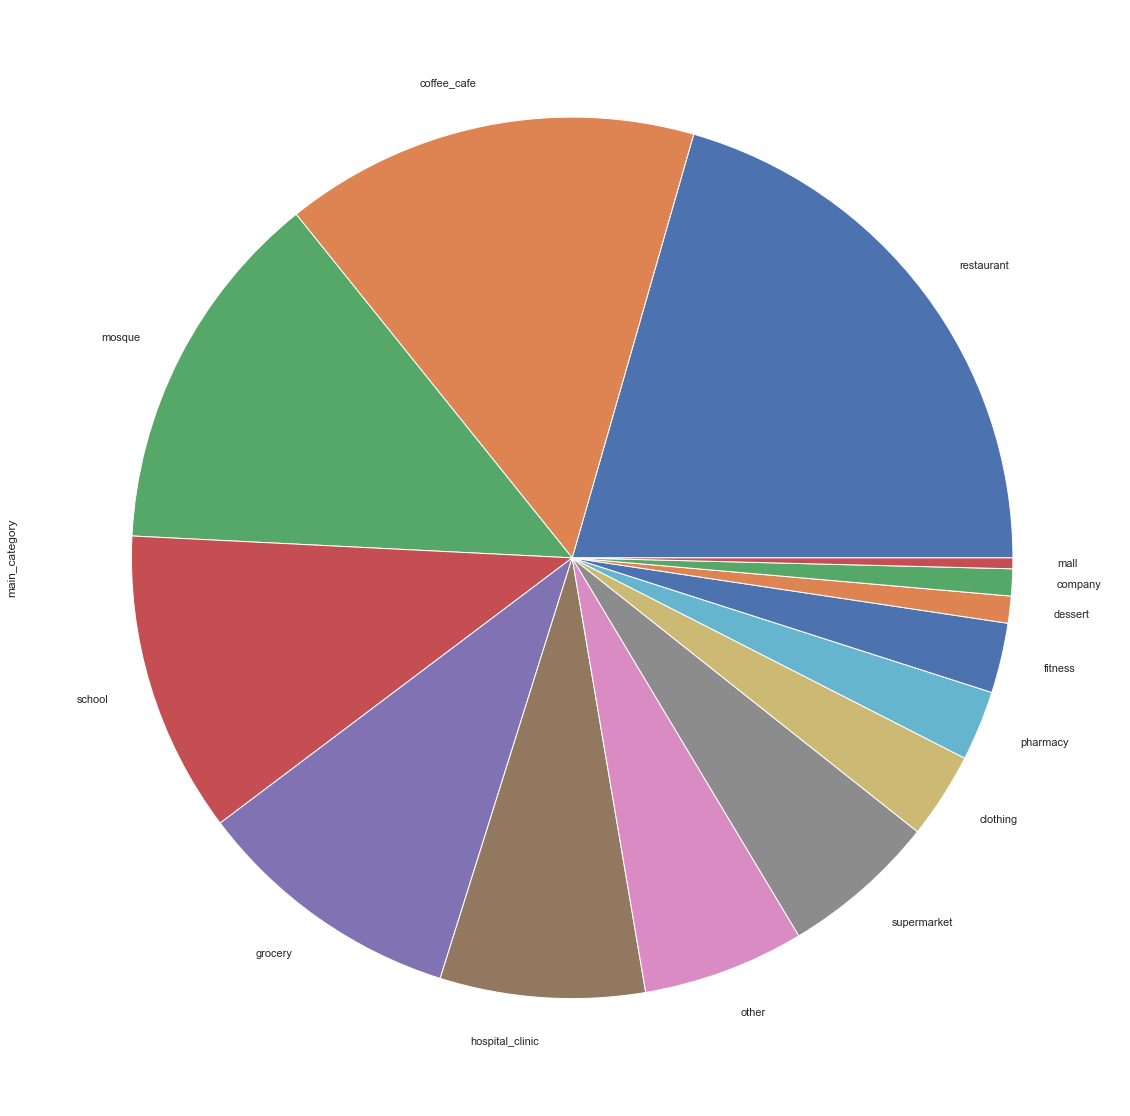

In [566]:
pd.value_counts(places_qurtubah['main_category']).plot.pie()

In [706]:
pd.value_counts(places_qurtubah['main_category'])

restaurant         104
coffee_cafe         77
mosque              68
school              56
grocery             50
hospital_clinic     37
supermarket         29
other               29
clothing            16
pharmacy            13
fitness             13
dessert              5
company              5
mall                 2
Name: main_category, dtype: int64

### Places distribution by sub-categories

### Types of resturants in Qurtubah

<AxesSubplot:>

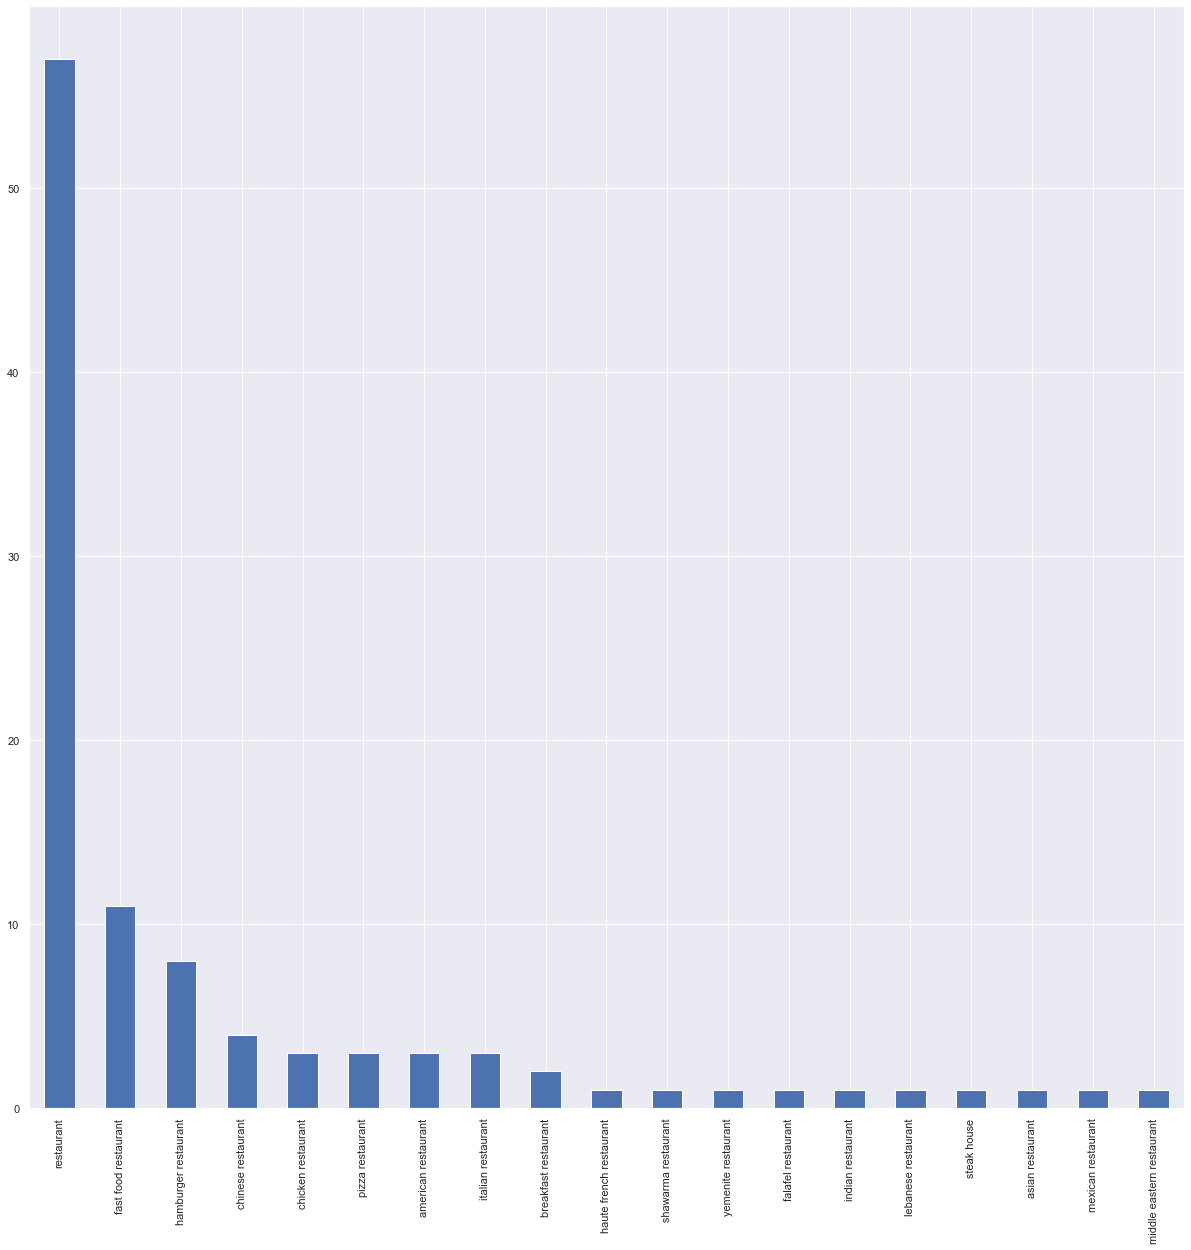

In [578]:
pd.value_counts(places_qurtubah['category'][places_qurtubah['main_category']=='restaurant']).plot.bar()

### Types of Convenience Stores in Qurtubah

<AxesSubplot:>

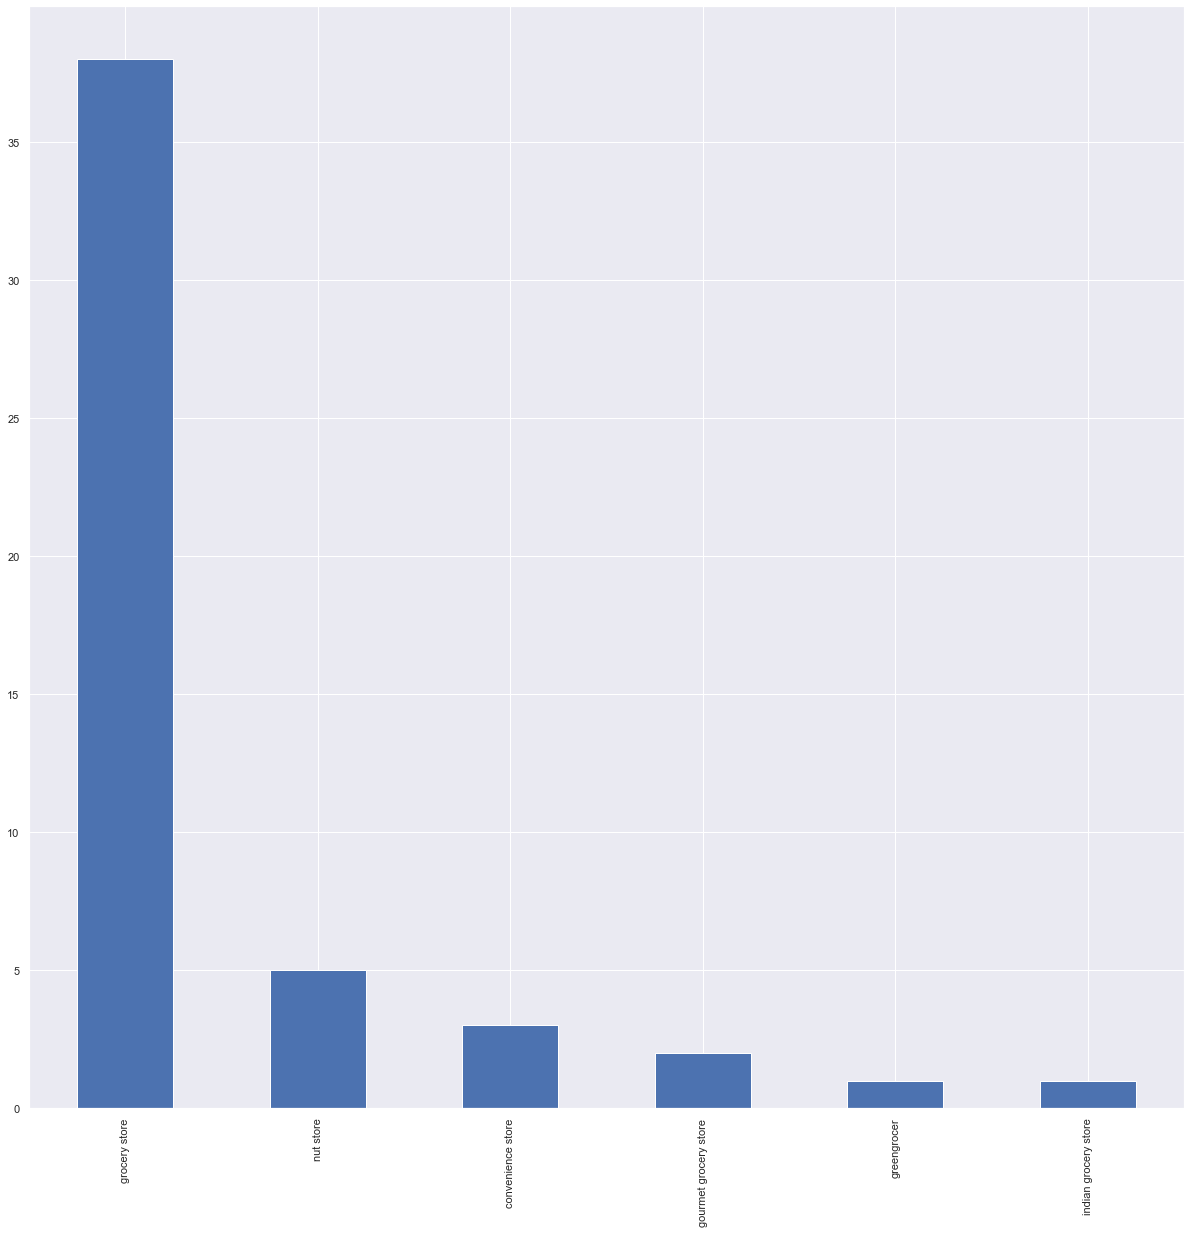

In [580]:
pd.value_counts(places_qurtubah['category'][places_qurtubah['main_category']=='grocery']).plot.bar()

### Places Price Range 

In [854]:
pd.value_counts(places_qurtubah['price']).plot.pie()

<AxesSubplot:ylabel='price'>

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 1490.4x1459.44 with 1 Axes>

### B)  What are the best destinations?

For this question we'll look at the data of resturants, cafes,to see the best places to have fun in Qurtubah!

### Top  Resturants

In [852]:
rest=places_qurtubah[places_qurtubah['main_category']=='restaurant']
rest[(rest['reviewsCount']>=200) & (rest['rating']>=4)].sort_values(by='rating', ascending=False)

,title,category,dist,lat,lng,rating,reviewsCount,price,distance,main_category
883,broburger,restaurant,"rp7g+xg qurtubah, riyadh saudi arabia",24.814910,46.726293,4.4,381.0,$,0.605897,restaurant
808,burgerfuel nakhlah,hamburger restaurant,"rp6m+5j qurtubah, riyadh saudi arabia",24.810420,46.734078,4.4,1112.0,$$$,0.718448,restaurant
2165,golden chimney / قولدن شيمني,indian restaurant,qurtubah,24.802600,46.738528,4.3,1524.0,$$,1.690419,restaurant
842,arabt alfool,restaurant,"rp3q+c6 qurtubah, riyadh saudi arabia",24.803609,46.738118,4.3,1193.0,$,1.570940,restaurant
904,piatto restaurant,italian restaurant,"rp5p+f5 qurtubah, riyadh saudi arabia",24.808660,46.735442,4.2,2221.0,$$,0.948754,restaurant
903,steak house,american restaurant,"rp5p+c4 qurtubah, riyadh saudi arabia",24.808615,46.735276,4.2,1457.0,$$$,0.947487,restaurant
812,بيتوتي,chinese restaurant,"rp4p+mh qurtubah, riyadh saudi arabia",24.806628,46.736498,4.2,466.0,$$,1.198111,restaurant
844,البيك - albaik,restaurant,"rpmm+24 qurtubah, riyadh saudi arabia",24.832603,46.732855,4.2,4187.0,$,1.781590,restaurant
899,firegrill,mexican restaurant,"rp5p+c4 qurtubah, riyadh saudi arabia",24.808622,46.735291,4.1,818.0,$$,0.947259,restaurant
886,samarqandi restaurant,restaurant,"rpjh+6q qurtubah, riyadh saudi arabia",24.830620,46.729397,4.1,5276.0,$,1.580924,restaurant


### Top  Cafes

In [853]:
rest=places_qurtubah[places_qurtubah['main_category']=='coffee_cafe']
rest[(rest['reviewsCount']>=200) & (rest['rating']>=4)].sort_values(by='rating', ascending=False)

,title,category,dist,lat,lng,rating,reviewsCount,price,distance,main_category
547,wafflelicious™ وافليشز,coffee store,"rppq+8m qurtubah, riyadh saudi arabia",24.835791,46.739216,4.5,227.0,NaN,2.254764,coffee_cafe
854,orta coffee,coffee shop,"rp8h+cg qurtubah, riyadh saudi arabia",24.816095,46.728825,4.4,217.0,NaN,0.325280,coffee_cafe
915,starbucks,coffee shop,"rp58+6m qurtubah, riyadh saudi arabia",24.808040,46.716678,4.3,201.0,$$,1.815912,coffee_cafe
916,coffee cherries,coffee shop,"rpjj+px qurtubah, riyadh saudi arabia",24.831834,46.732477,4.3,816.0,$$,1.694684,coffee_cafe
924,ounce speciality cafe,cafe,"rp8g+2j qurtubah, riyadh saudi arabia",24.815002,46.726604,4.3,995.0,$,0.572848,coffee_cafe
740,8oz coffee | ايت اوز كوفي,coffee shop,"rp6m+vr qurtubah, riyadh saudi arabia",24.812143,46.734597,4.2,558.0,NaN,0.560631,coffee_cafe
821,ben's art,cafe,"rp7m+8j qurtubah, riyadh saudi arabia",24.813359,46.734125,4.2,308.0,NaN,0.419328,coffee_cafe
864,besalu cafe,coffee shop,"rpjj+qx qurtubah, riyadh saudi arabia",24.831961,46.732392,4.2,457.0,NaN,1.708479,coffee_cafe
872,java time,cafe,"rp7g+xv qurtubah, riyadh saudi arabia",24.814908,46.727135,4.2,1321.0,$$,0.525859,coffee_cafe
925,quill cafe,cafe,"rp7g+w8 qurtubah, riyadh saudi arabia",24.814763,46.725764,4.2,416.0,NaN,0.661687,coffee_cafe


### Hidden Gems 
some of the not so popular but highly rated places in qurtubah.

In [862]:
rest=places_qurtubah[places_qurtubah['main_category']=='restaurant']
rest[(rest['reviewsCount']>50)&(rest['reviewsCount']<=200) & (rest['rating']>=4.3)].sort_values(by='rating', ascending=False)

,title,category,dist,lat,lng,rating,reviewsCount,price,distance,main_category
902,the 365,restaurant,"rp59+87 qurtubah, riyadh saudi arabia",24.808320,46.718294,4.8,67.0,NaN,1.661709,restaurant
819,مطعم تشرين | teshrine restaurant,restaurant,"rp4p+mh qurtubah, riyadh saudi arabia",24.806724,46.736478,4.3,119.0,NaN,1.187573,restaurant


In [863]:
cafe=places_qurtubah[places_qurtubah['main_category']=='coffee_cafe']
cafe[(cafe['reviewsCount']>50)&(cafe['reviewsCount']<=200) & (cafe['rating']>=4.3)].sort_values(by='rating', ascending=False)

,title,category,dist,lat,lng,rating,reviewsCount,price,distance,main_category
550,ارتو كافيه | 𝐀𝐑𝐓𝐎 𝐂𝐀𝐅𝐄,cafe,"rq92+fr qurtubah, riyadh saudi arabia",24.818746,46.752049,4.7,162.0,NaN,2.037492,coffee_cafe
913,خبير الشاي,coffee shop,"rpgm+h9 qurtubah, riyadh saudi arabia",24.826408,46.733494,4.6,133.0,NaN,1.101004,coffee_cafe
582,قهوة انزو enzo coffee,coffee store,"rp4p+qx qurtubah, riyadh saudi arabia",24.806915,46.737487,4.5,94.0,NaN,1.210978,coffee_cafe
910,محتوى القهوة - coffee content,coffee shop,"rp9j+3r qurtubah, riyadh saudi arabia",24.817650,46.732077,4.5,115.0,NaN,0.117046,coffee_cafe
857,مزاج مغربي,coffee shop,"rq42+38 qurtubah, riyadh saudi arabia",24.805185,46.750795,4.3,145.0,NaN,2.282493,coffee_cafe
874,rwana coffee قهوة روانا (مختصة),coffee shop,"rq73+qf qurtubah, riyadh saudi arabia",24.814427,46.753736,4.3,137.0,NaN,2.207017,coffee_cafe


### C)  How family friendly is the neiborhood?

for a neiborhood to be considred family friendly some criteria needs to be met, it needs to have  a descent number of the following amenities :
1) Good Schools.

2) Kid-Friendly Amenities.

3) Neighbors (people density).

4) Daily Necessities.

and also it needs to have a low crime congestion.
I cannot assess crime rate or density because the data isn't avilable, but I can assess the availability of schools and nurseries, parks, and daily necessities.


Source: https://www.neighborhoods.com/blog/what-makes-a-neighborhood-family-friendly

<AxesSubplot:>

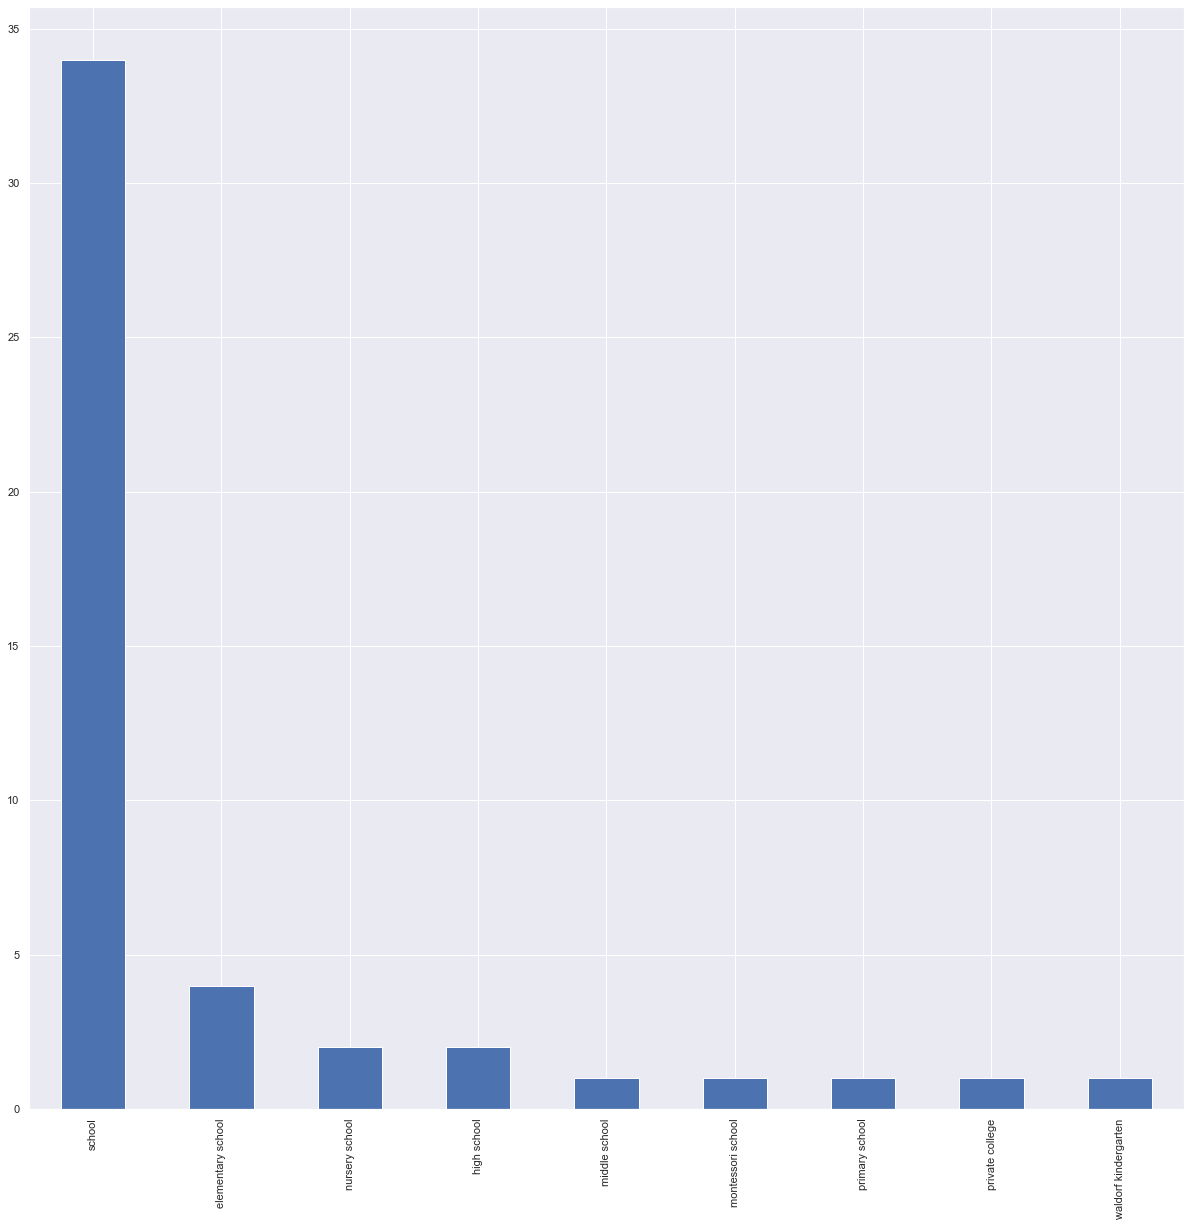

In [803]:
pd.value_counts(places_qurtubah['category'][places_qurtubah['main_category']=='school']).plot.bar()

In [804]:
places_qurtubah['category'][places_qurtubah['category']=='school'].count()

34

In [805]:
places_qurtubah['category'][places_qurtubah['category']=='nursery'].count()

8

there're 34 schools in qurtubah for all educational levels, there are also 8 nurseries which is really important for working moms, we can see the density of schools in the following heatmap

In [819]:
from folium.plugins import HeatMap

mapS = folium.Map(
    location=[neighborhood_latitude, neighborhood_longitude], 
    tiles='Stamen Toner', 
    zoom_start=14,)

heat_df = Qs[['lat', 'lng']]
heat_df = Qs.dropna(axis=0, subset=['lat','lng'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lng']] for index, row in Qs.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(mapS)

# Display the map
mapS

### Schools Rating

In [836]:
Qs=Qs.dropna(subset=['rating'], how='any')
Qs['reviewsCount']=Qs['reviewsCount'].astype(int)

In [844]:
Qs[Qs['reviewsCount']>=20].sort_values(by='rating', ascending=False)

,title,category,dist,lat,lng,rating,reviewsCount,price,distance,main_category
322,معهد النجاح لتعليم الوحيين,school,"rphj+6c qurtubah, riyadh saudi arabia",24.828064,46.731059,4.6,22,NaN,1.278318,school
805,مدارس ابن رشد قرطبة,school,"rp7x+h8 qurtubah, riyadh saudi arabia",24.813917,46.748270,4.5,97,NaN,1.668986,school
375,حضانة بدايات,nursery school,"rp6v+6f qurtubah, riyadh saudi arabia",24.810522,46.743692,4.4,45,NaN,1.359873,school
385,برنامج الرياحين لتحفيظ القرآن الكريم فرع قرطبة,school,"rp3j+3q qurtubah, riyadh saudi arabia",24.802658,46.731818,4.1,31,NaN,1.550378,school
702,average building,elementary school,"rp9h+vh qurtubah, riyadh saudi arabia",24.819663,46.728979,3.8,51,NaN,0.457105,school
782,primary school boys,school,"rpgw+q6 qurtubah, riyadh saudi arabia",24.826913,46.745550,3.7,332,NaN,1.784744,school
710,مدارس التربية النموذجية قرطبة,school,"rp7q+m6 qurtubah, riyadh saudi arabia",24.814168,46.738106,3.7,64,NaN,0.672969,school
1920,riyadh elm university,private college,"rp39+95 qurtubah, riyadh saudi arabia",24.803396,46.717934,3.7,40,NaN,2.042346,school
648,مدارس ابناء المجد,school,"rp3h+4w qurtubah, riyadh saudi arabia",24.802901,46.730036,3.7,26,NaN,1.536119,school
695,متوسطة عبدالعزيز بن عمير,school,"rp4w+hw qurtubah, riyadh saudi arabia",24.806385,46.747341,3.6,41,NaN,1.920367,school


there are some good schools in qurtubah but most schools have a low rating.

### Avilability Of Medical Services  In Qurtubah

<AxesSubplot:>

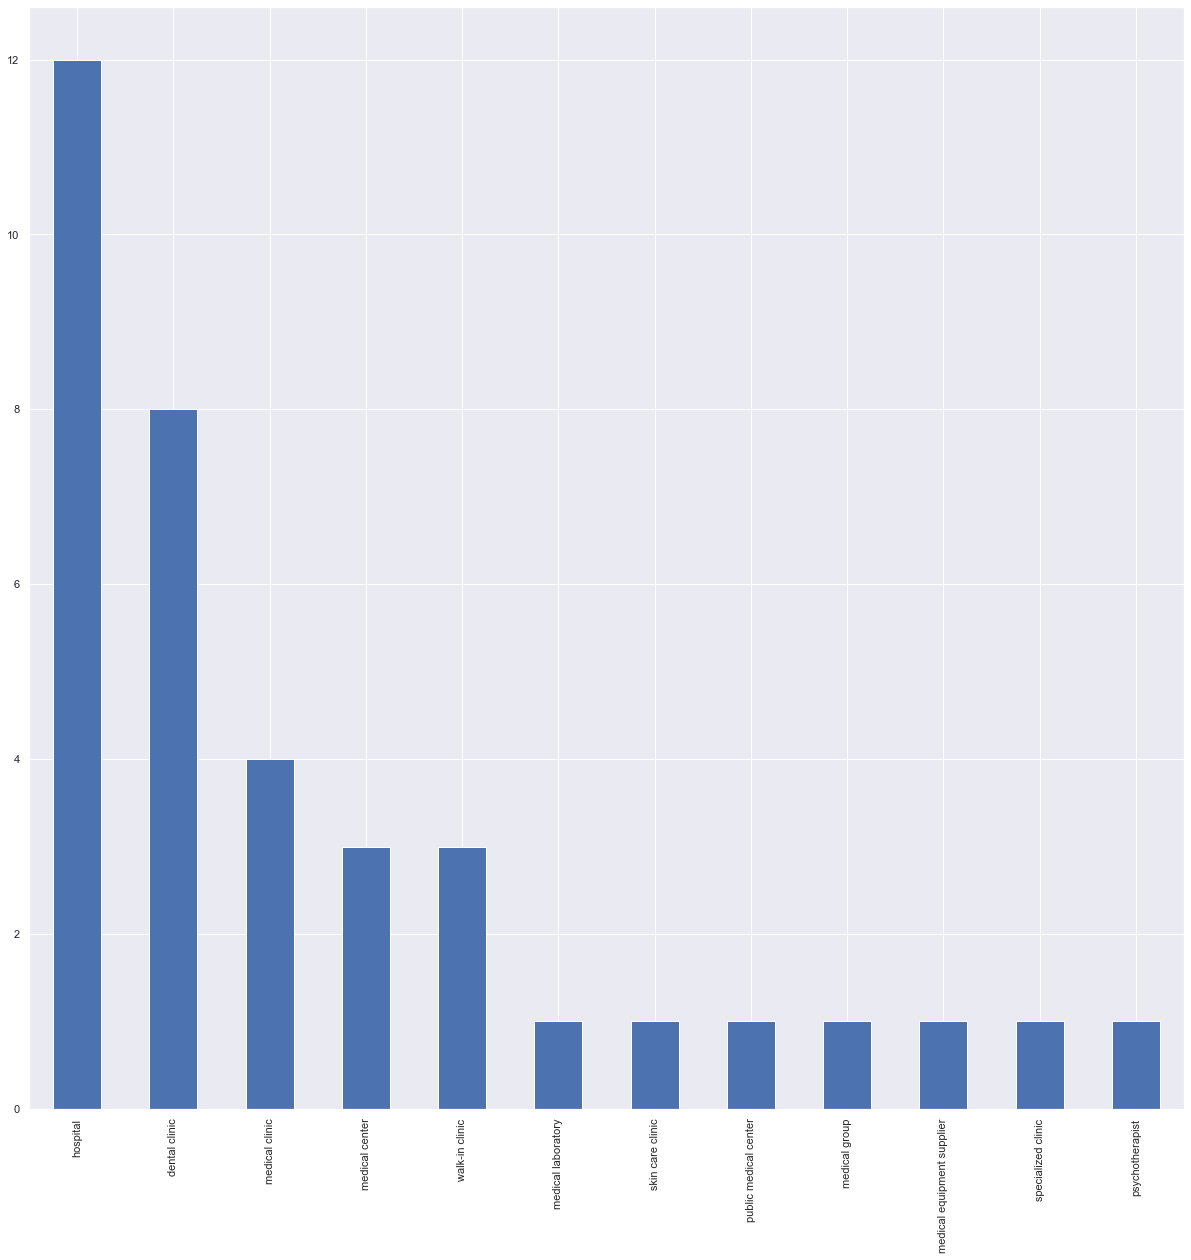

In [809]:
pd.value_counts(places_qurtubah['category'][places_qurtubah['main_category']=='hospital_clinic']).plot.bar()

As noticed, there're diverse medical scervices in qurtubah. 

In [822]:
#parks
places_qurtubah[places_qurtubah['category']=='park']
#it's most likely that the data for parks isn't accurate.


,title,category,dist,lat,lng,rating,reviewsCount,price,distance,main_category
2067,qurtubah walking area,park,qurtubah,24.802411,46.734318,NaN,NaN,NaN,1.594997,other
2068,qurtubah park,park,qurtubah,24.805671,46.740503,NaN,NaN,NaN,1.487727,other
2070,ayra park,park,qurtubah,NaN,NaN,NaN,NaN,NaN,NaN,other


In [824]:
#mosques
from folium.plugins import HeatMap

mapM= folium.Map(
    location=[neighborhood_latitude, neighborhood_longitude], 
    tiles='Stamen Toner', 
    zoom_start=14,)

heat_df = Qm[['lat', 'lng']]
heat_df = Qm.dropna(axis=0, subset=['lat','lng'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lng']] for index, row in Qm.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(mapM)

# Display the map
mapM

the avilability of groceries have been stated before as for pharmacies and other daily necessities, so it's established that qurtubah is acctually a very family friendly neiborhood.

### D) How is rent affected in comparsion to other neighborhoods?

In [661]:
rent_dist= pd.read_csv('/Users/workplace/Documents/GitHub/Neighborhood-Insight-Qurtubah/data/rent_dist.csv')
rent_q= pd.read_csv('/Users/workplace/Documents/GitHub/Neighborhood-Insight-Qurtubah/data/qurtubah_rent.csv')

In [662]:
rent_dist.head()

,dist,rent_3_rooms_ave
0,اشبيلية,21227
1,الازدهار,30016
2,الاسكان,17400
3,الاندلس,25009
4,البديعه,15826


In [663]:
rent_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dist              116 non-null    object
 1   rent_3_rooms_ave  116 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [664]:
rent_dist.shape

(116, 2)

In [665]:
rent_dist.sort_values('rent_3_rooms_ave',ascending=False, inplace=True)
rent_dist.reset_index(drop=True, inplace=True)

#### top 20 expensive nieborhoods 

In [702]:
rent_dist[:21]

,dist,rent_3_rooms_ave
0,الرائد,40000
1,الواحة,38000
2,الندى,35769
3,العليا,35681
4,الرحمانية,35437
5,النخيل,34907
6,الملقا,34899
7,الملك عبدالله,34600
8,الربيع,34332
9,الغدير,34000


In [703]:
rent_dist[rent_dist['dist']=='قرطبة']

,dist,rent_3_rooms_ave
38,قرطبة,27147


qurtubah's average rent ranks at 38th, it's not one of the most expensive neiborhoods, but it's certainly above average, in the following cells we'll see how it compares to the average rent cost 

In [667]:
df_values=rent_dist.describe()

In [668]:
df_values.drop(['count', 'std','25%', '50%', '75%'], inplace=True)

In [669]:
df_values=df_values.append(rent_dist[rent_dist['dist']=='قرطبة'])


In [670]:
df_values.sort_values('rent_3_rooms_ave',inplace=True)

In [675]:
df_values

,rent_3_rooms_ave,dist
min,11076.000000,NaN
mean,22479.508621,NaN
38,27147.000000,قرطبة
max,40000.000000,NaN


In [697]:
df_values.rename(index={38: 'Qurtubah'},inplace=True)


In [698]:
df_values

,rent_3_rooms_ave,dist
min,11076.000000,NaN
mean,22479.508621,NaN
Qurtubah,27147.000000,قرطبة
max,40000.000000,NaN


<AxesSubplot:>

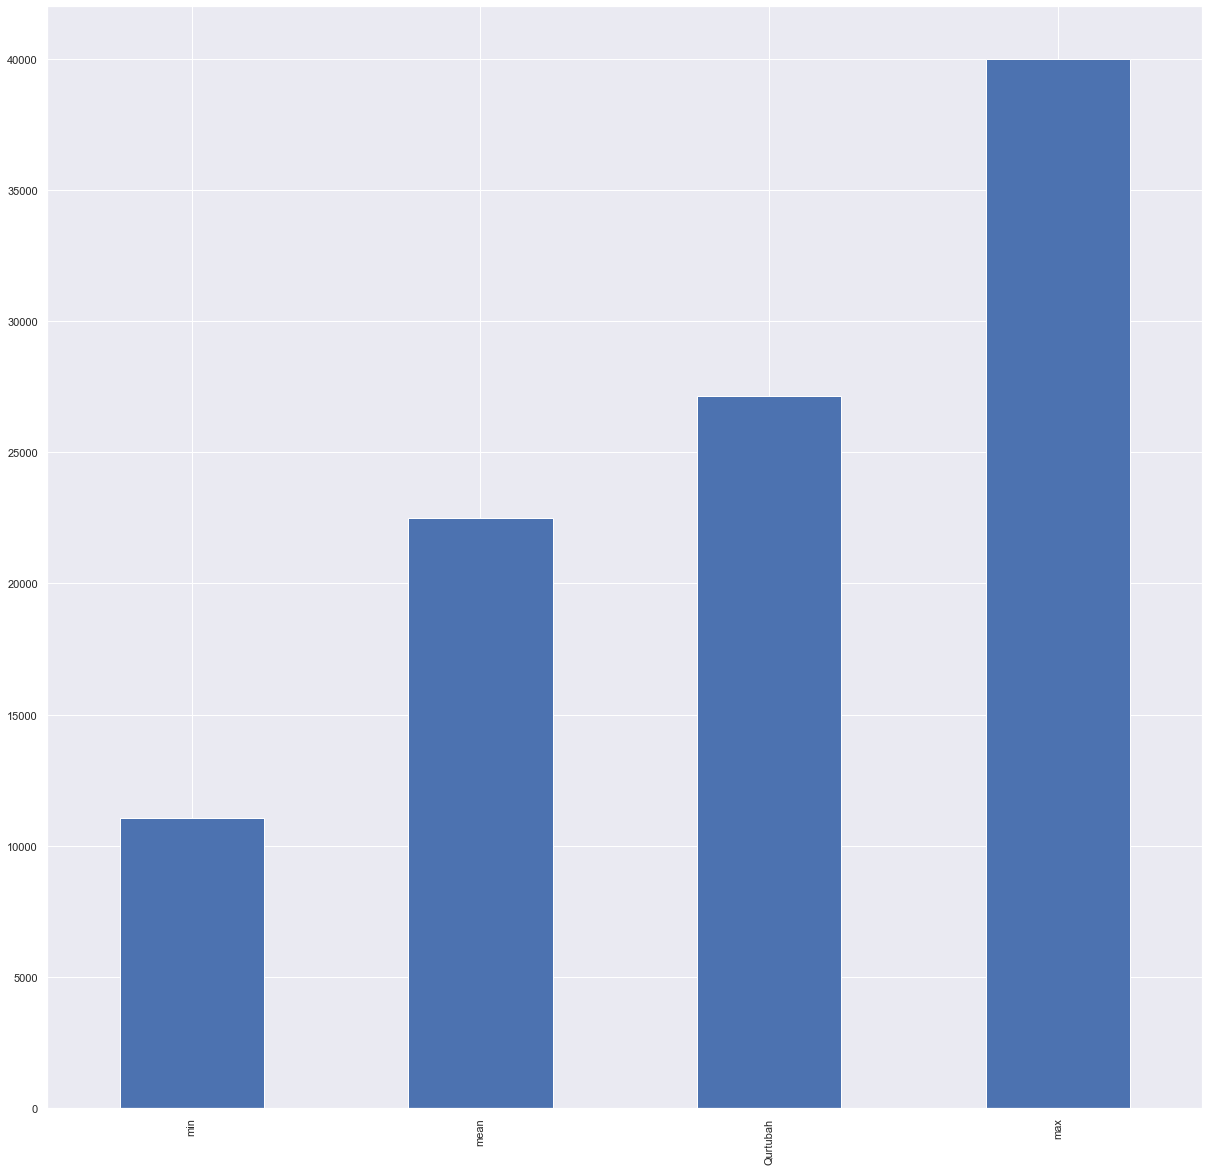

In [681]:
df_values['rent_3_rooms_ave'].plot.bar()

In [700]:
qur=df_values[df_values.index=='Qurtubah']['rent_3_rooms_ave'].values[0]
ave=df_values[df_values.index=='mean']['rent_3_rooms_ave'].values[0]
qurt_ave_diff=qur-ave
qurt_ave_diff

4667.491379310344

we can see from the previous plot that rent in qurtubah is above the average rent, the exact difference of yearly rent is equal to (4667.491) riyals, but Qurtubah is still 

In [642]:
df_values_a= np.array(df_values.index)
df_values_a

array(['mean', 'min', 'max'], dtype=object)

In [368]:
rent_q.head()

,Rent,Year
0,"28,000",النصف الأول 2015
1,"28,345",النصف الثاني 2015
2,"28,328",النصف الأول 2016
3,"27,249",النصف الثاني 2016
4,"26,969",النصف الأول 2017


In [791]:
rent_q['Rent']=rent_q['Rent'].replace(',', '', regex=True).astype(float)

In [788]:
rent_q.head()

,Rent,Year
0,"28,000",النصف الأول 2015
1,"28,345",النصف الثاني 2015
2,"28,328",النصف الأول 2016
3,"27,249",النصف الثاني 2016
4,"26,969",النصف الأول 2017


In [789]:
rent_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rent    13 non-null     object
 1   Year    13 non-null     object
dtypes: object(2)
memory usage: 336.0+ bytes


Text(0.5, 1.0, "change of qurtubah's rent prices over the years")

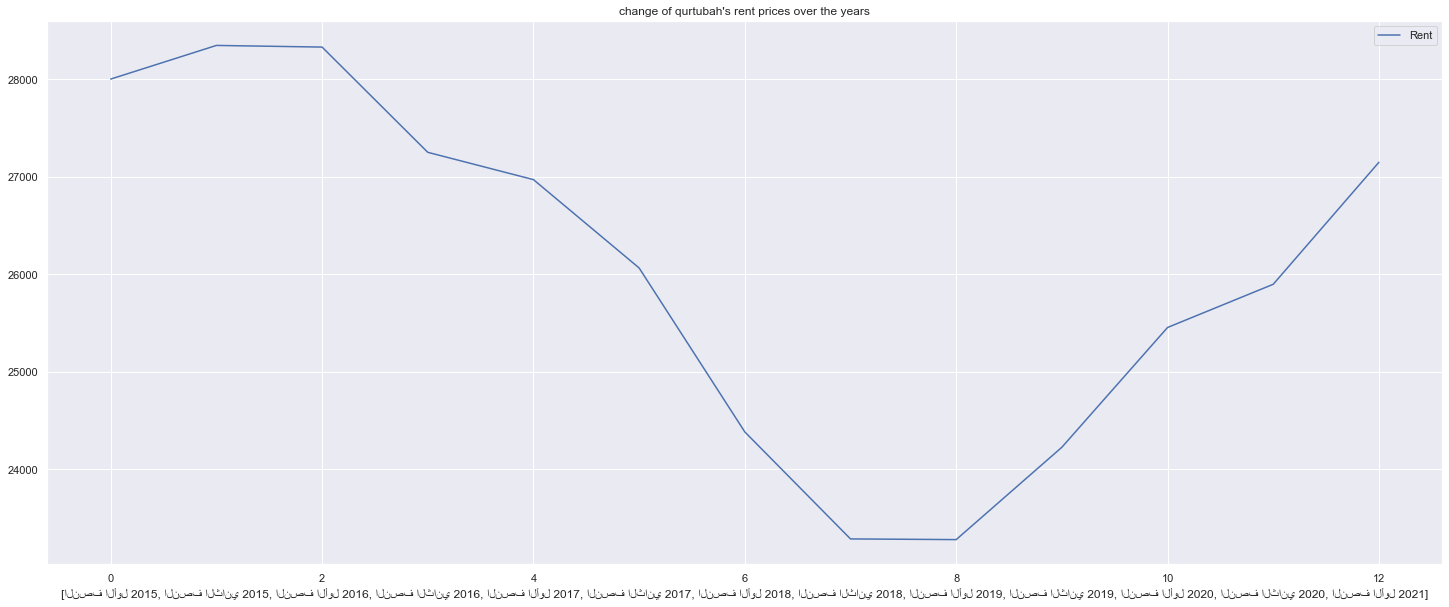

In [802]:
rent_q.plot( xlabel=rent_q['Year'],figsize = (25,10))
plt.title('change of qurtubah\'s rent prices over the years')

we can see that rent cost of Qurtubah was at 28k at 2015 then it continued to decrease until it started to increase again in 2019, and it'll probably continue to increase due to high demand and new bussinese openinng in the area. 

## Conclusion

Through this project we found that Qurtubah has great diversity in its destinations equaling to about 82 subcategories and 14 main categories, the number of destenations is also very high, it has about 77 coffee related stores and 104 resturants of different types, there're all kinds of important neiborhood amenities like schools, mosques, clinics, phrmacies, and groceries. 
the neiborhood is very family-friendly and has a large number of schools that are at walking distance. 
Rent in qurtubah is above average and is expected to increase in the upcoming years. 

Due to lack of time, some work is left for the future, there is still more cleaning to do, and alot of quiestions to answer like walkability and other measures. 